In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import random
import sklearn.preprocessing
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# CLUSTERING POR DEPARTAMENTOS


### Permitira ver si hay una correlación entre divorcios y denuncias de violencia intrafamiliar en cada departamento. Este clustering nos dirá qué departamentos tienen patrones similares en términos de divorcios y violencia

In [41]:
def clean_numeric(df):
    for col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '').str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

divorcios = pd.read_csv("../data/Divorcios por departamento.csv")
divorcios = clean_numeric(divorcios)

#Renombrar coluimnas
divorcios = divorcios.rename(columns={"República": "Total_Divorcios_Republica"})

nuevos_nombres = {}
for col in divorcios.columns:
    if col not in ["Año", "Total_Divorcios_Republica"]:
        nuevos_nombres[col] = f"{col}_Divorcios"

divorcios = divorcios.rename(columns=nuevos_nombres)

num_intra_dep = pd.read_csv("../data/Número de denuncias de violencia intrafamiliar por departamento.csv")
num_intra_dep = clean_numeric(num_intra_dep)
num_intra_dep = num_intra_dep.rename(columns={"República" : "Total_Denuncias_Intrafamiliar_República"})

nuevos_nombres.clear()
nuevos_nombres = {}
for col in num_intra_dep.columns:
    if col not in ["Año", "Total_Denuncias_Intrafamiliar_República"]:
        nuevos_nombres[col] = f"{col}_Denuncias"

num_intra_dep = num_intra_dep.rename(columns=nuevos_nombres)

departamentos = pd.merge(divorcios, num_intra_dep, on="Año", how="inner")

departamentos


,Año,Total_Divorcios_Republica,Guatemala_Divorcios,El Progreso_Divorcios,Sacatepéquez_Divorcios,Chimaltenango_Divorcios,Escuintla_Divorcios,Santa Rosa_Divorcios,Sololá_Divorcios,Totonicapán_Divorcios,...,Quiché_Denuncias,Baja Verapaz_Denuncias,Alta Verapaz_Denuncias,Petén_Denuncias,Izabal_Denuncias,Zacapa_Denuncias,Chiquimula_Denuncias,Jalapa_Denuncias,Jutiapa_Denuncias,Ignorado_Denuncias
0,2022,9950,3295,179,174,210,497,316,137,201,...,629,1331,4561,1043,918,903,475,456,1245,549
1,2021,9621,3339,206,189,258,496,323,96,180,...,612,1210,4402,1037,902,1167,511,387,1550,84
2,2020,4074,1361,68,85,122,172,164,41,88,...,363,912,3881,794,678,867,576,357,1327,39
3,2019,8203,3491,146,168,172,389,208,110,157,...,607,833,4379,827,709,775,540,383,1161,34
4,2018,6255,2185,115,153,147,302,174,71,135,...,575,548,3873,799,795,635,566,534,1294,32
5,2017,5808,2075,108,154,129,345,172,67,108,...,705,651,4240,1087,647,706,455,698,1139,43
6,2016,5665,2142,95,133,106,297,179,63,86,...,1002,771,3492,1282,584,538,429,594,1059,66
7,2015,5726,2185,98,115,125,306,187,59,96,...,1095,874,3485,1295,580,606,399,732,862,43
8,2014,5575,2044,114,138,124,291,135,57,100,...,1158,1265,3253,981,672,703,465,976,1353,97
9,2013,5542,2261,86,122,82,210,95,52,79,...,741,1195,3343,1086,814,757,443,840,1203,279


## Histograma multiple de variables

<Figure size 1500x800 with 0 Axes>

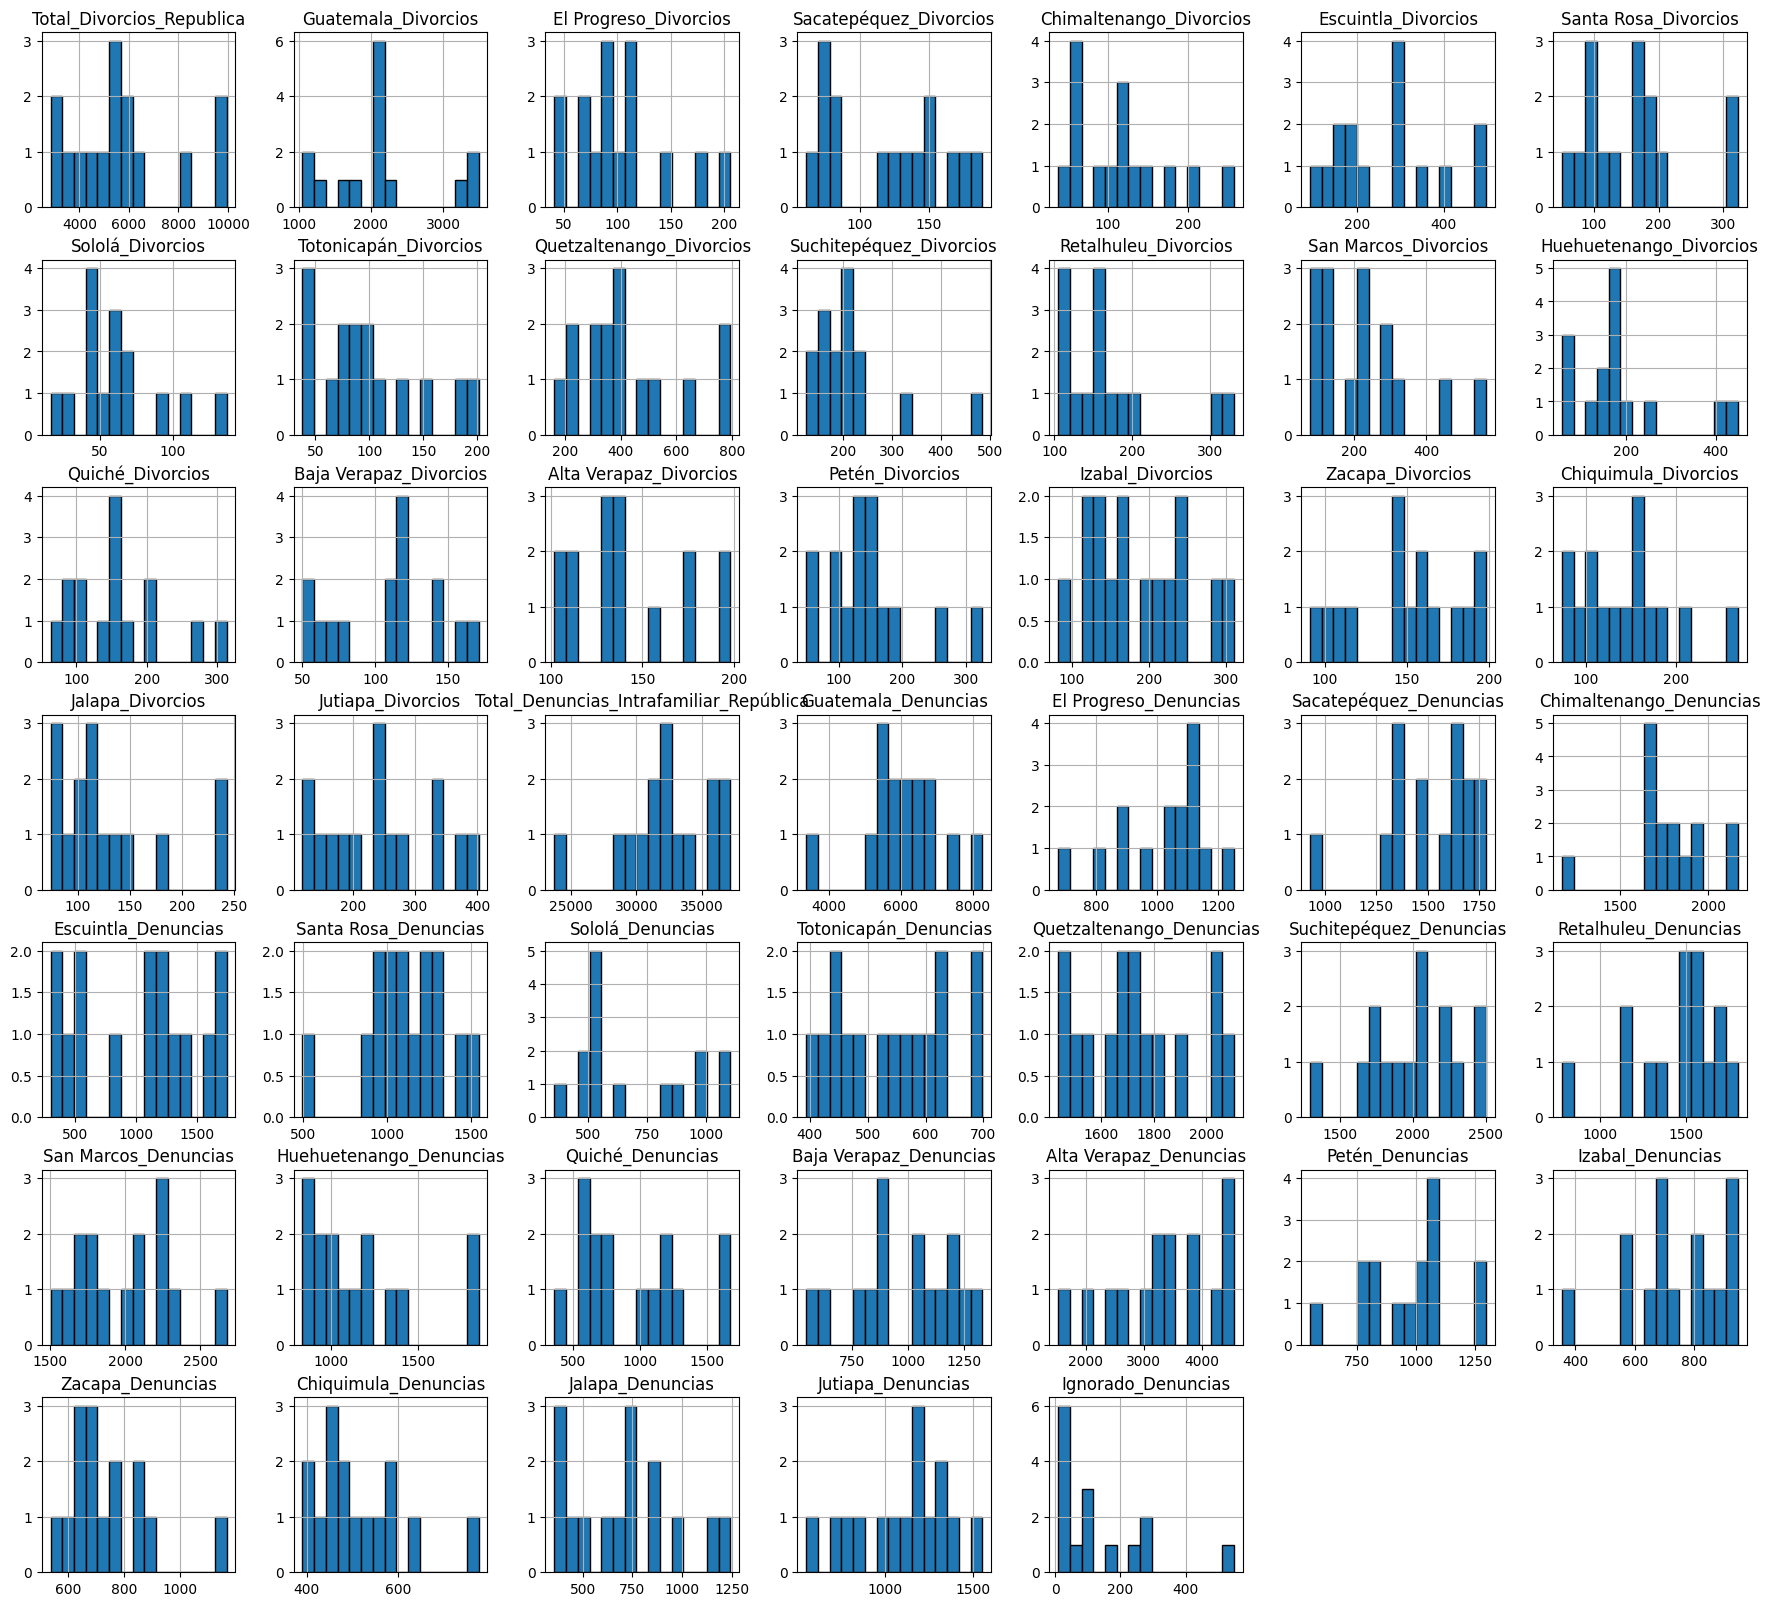

In [52]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(15, 8))

# Graficar histogramas de todas las columnas excepto 'Año'
departamentos.drop(['Año'], axis='columns').hist(figsize=(22, 20), bins=15, edgecolor='black')

# Mostrar la gráfica
plt.show()

In [56]:
Y = np.array(departamentos[['Año']])
X = np.array(departamentos[['Total_Divorcios_Republica', 'Guatemala_Divorcios', 'El Progreso_Divorcios', 'Sacatepéquez_Divorcios', 'Chimaltenango_Divorcios', 'Escuintla_Divorcios', 'Santa Rosa_Divorcios', 'Sololá_Divorcios', 'Totonicapán_Divorcios', 'Quetzaltenango_Divorcios', 'Suchitepéquez_Divorcios', 'Retalhuleu_Divorcios', 'San Marcos_Divorcios', 'Huehuetenango_Divorcios', 'Quiché_Divorcios', 'Baja Verapaz_Divorcios', 'Alta Verapaz_Divorcios', 'Petén_Divorcios', 'Izabal_Divorcios', 'Zacapa_Divorcios', 'Chiquimula_Divorcios', 'Jalapa_Divorcios', 'Jutiapa_Divorcios', 'Total_Denuncias_Intrafamiliar_República', 'Guatemala_Denuncias', 'El Progreso_Denuncias', 'Sacatepéquez_Denuncias', 'Chimaltenango_Denuncias', 'Escuintla_Denuncias', 'Santa Rosa_Denuncias', 'Sololá_Denuncias', 'Totonicapán_Denuncias', 'Quetzaltenango_Denuncias', 'Suchitepéquez_Denuncias', 'Retalhuleu_Denuncias', 'San Marcos_Denuncias', 'Huehuetenango_Denuncias', 'Quiché_Denuncias', 'Baja Verapaz_Denuncias', 'Alta Verapaz_Denuncias', 'Petén_Denuncias', 'Izabal_Denuncias', 'Zacapa_Denuncias', 'Chiquimula_Denuncias', 'Jalapa_Denuncias', 'Jutiapa_Denuncias', 'Ignorado_Denuncias']])
X.shape

(15, 47)

## Estadistico de Hopkings

In [64]:
def hopkins_statistic(X, sample_size=None):
    if sample_size is None:
        sample_size = int(0.1 * len(X))  # Usar el 10% de los datos

    # Normalizar los datos
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    n = X_scaled.shape[0]  # Número total de observaciones
    random.seed(123)  # Fijar la semilla para reproducibilidad

    # Tomar una muestra aleatoria de los datos
    sample_indices = random.sample(range(n), sample_size)
    X_sample = X_scaled[sample_indices]

    # Generar puntos aleatorios dentro del mismo rango de valores de X
    min_vals, max_vals = X_scaled.min(axis=0), X_scaled.max(axis=0)
    X_random = np.random.uniform(min_vals, max_vals, (sample_size, X.shape[1]))

    # Calcular la distancia más cercana de cada muestra a cualquier otro punto en X
    w_distances = np.min(cdist(X_sample, X_scaled, metric='euclidean'), axis=1)

    # Calcular la distancia más cercana de cada punto aleatorio a cualquier punto en X
    u_distances = np.min(cdist(X_random, X_scaled, metric='euclidean'), axis=1)

    # Estadística de Hopkins
    hopkins_stat = np.sum(w_distances) / (np.sum(w_distances) + np.sum(u_distances))
    return hopkins_stat

# Datos de ejemplo (reemplázalos con tus datos reales)
X = np.random.rand(100, 2)  # 100 puntos en 2 dimensiones

# Calcular la Estadística de Hopkins
hopkins_value = hopkins_statistic(X)
print(f'Estadística de Hopkins: {hopkins_value}')

Estadística de Hopkins: 0.0


 Como se puede observar el estadístico de hopkings no es igual a 0.5 por lo que se dice que es factible hacer agrupamiento.

# CLUSTERING DE VICTIMAS DE VIOLENCIA POR EDAD Y GENERO

### Podremos encontrar patrones en los grupos más afectados, por ejemplo, si ciertas edades presentan más denuncias en un género específico.

In [39]:
por_edad = pd.read_csv("../data/Numero de denuncias de violencia intrafamiliar por grupos quinquenales de edad.csv")
# Cargar nuevamente el dataset de edad para asegurar que esté limpio

df_por_edad = pd.read_csv("../data/Numero de denuncias de violencia intrafamiliar por grupos quinquenales de edad.csv")


# Limpiar los datos (convertir valores con comas en números)
df_por_edad = clean_numeric(df_por_edad)

# Calcular la suma real de los grupos de edad (excluyendo "Total" e "Ignorado" si existen)
columnas_edad = [col for col in df_por_edad.columns if col not in ["Año", "Total"]]
df_por_edad["Total_Corregido"] = df_por_edad[columnas_edad].sum(axis=1)

# Eliminar el total original y actualizar con el total corregido
df_por_edad = df_por_edad.drop(columns=["Total"])
df_por_edad = df_por_edad.rename(columns={"Total_Corregido": "Total"})

df_por_edad = df_por_edad.rename(columns={"Ignorado" : "Ignorado-Edad"})

por_sexo = pd.read_csv("../data/Numero de denuncias de violencia intrafamiliar por sexo de la victima.csv")
por_sexo = clean_numeric(por_sexo)

edad_genero = pd.merge(df_por_edad, por_sexo, on="Año", how="inner")

edad_genero


,Año,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 y más,Ignorado-Edad,Total_x,Total_y,Hombre,Mujer
0,2008,21,58,178,2211,4354,4707,3937,2787,1925,1196,795,457,286,486,323,23721,23721,2290,21431
1,2009,29,43,221,2748,5955,6190,5154,3816,2472,1682,1039,621,421,757,349,31497,31497,2985,28512
2,2010,36,54,224,2979,5974,6187,5441,3826,2508,1663,1002,612,423,756,332,32017,32017,2858,29159
3,2011,38,48,223,3070,6213,6261,5599,4121,2600,1768,1117,674,472,842,438,33484,33484,2906,30578
4,2012,21,78,242,3373,6825,6823,6081,4402,2795,1774,1172,702,482,877,460,36107,36107,2967,33140
5,2013,26,50,280,3420,6780,6816,6056,4287,2913,1789,1241,727,509,848,428,36170,36170,3252,32918
6,2014,57,86,304,3316,6275,6367,5648,4166,2747,1721,1114,725,538,889,377,34330,34330,3233,31097
7,2015,44,85,275,2895,5998,5972,5162,3985,2505,1539,1046,713,496,915,299,31929,31929,3221,28708
8,2016,41,76,240,2717,5716,5887,5048,3821,2503,1543,1039,715,497,885,462,31190,31190,3295,27895
9,2017,49,83,245,2369,5677,5714,4687,3873,2490,1676,1008,681,500,943,389,30384,30384,3675,26709


# CLUSTERING DE TIPOS DE VIOLENCIA

### Aplicar clustering aquí nos permitirá identificar grupos de violencia comunes (por ejemplo, si violencia psicológica y física suelen ocurrir juntas en ciertos patrones).

In [37]:
tipo_agresion = pd.read_csv("../data/Numero de denuncias de violencia intrafamiliar por tipo de agresion sufrida.csv")
tipo_agresion = clean_numeric(tipo_agresion)
tipo_agresion

,Año,Total,Física,Psicológica,Sexual,Patrimonial,Física - psicológica,Física - sexual,Física - patrimonial,Psicológica - sexual,Psicológica - patrimonial,Sexual - patrimonial,Física - psicológica - sexual,Física - psicológica - patrimonial,Psicológica - sexual - patrimonial,Física - sexual - patrimonial,Física - psico - sexual - patrimonial
0,2008,23721,3765,6111,49,310,9572,56,115,83,1116,1,339,1912,28,7,257
1,2009,31497,4133,8552,78,449,13371,85,127,121,1519,7,450,2305,18,10,272
2,2010,32017,4177,8145,65,296,14267,63,133,140,1326,5,445,2606,29,10,310
3,2011,33484,4014,9279,73,308,14425,61,164,128,1521,5,443,2718,41,8,296
4,2012,36107,3841,10190,72,305,15735,66,149,121,1710,4,479,3101,25,7,302
5,2013,36170,4050,11188,94,265,14741,57,108,130,1850,6,439,2962,33,7,240
6,2014,34330,3632,10864,131,222,13783,53,84,153,1835,11,383,2942,21,3,213
7,2015,31929,3584,10664,105,451,12528,62,63,154,1357,3,295,2446,21,11,185
8,2016,31190,3972,10729,101,459,11570,59,84,111,1445,2,249,2269,11,8,121
9,2017,30384,3713,11993,150,435,10363,64,63,132,1420,8,234,1667,28,6,108


# CLUSTERING GENERAL DE DIVORCIO Y VIOLENCIA

### Podemos hacer clustering para analizar tendencias generales.

In [38]:
divorcios_intrafamiliar = pd.read_csv("../data/divorcios_violencia_intrafamiliar.csv")
divorcios_intrafamiliar = clean_numeric(divorcios_intrafamiliar)
divorcios_intrafamiliar

,Año,Total_Divorcios_Republica,Total_Denuncias_Intrafamiliar_República,Guatemala_Divorcios,Guatemala_Denuncias,El Progreso_Divorcios,El Progreso_Denuncias,Sacatepéquez_Divorcios,Sacatepéquez_Denuncias,Chimaltenango_Divorcios,...,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 y más,Ignorado-Edad
0,2008,2834,23721,1052,5117,45,978,80,926,58,...,4707,3937,2787,1925,1196,795,457,286,486,323
1,2009,3004,31497,1140,6692,41,1108,77,1368,59,...,6190,5154,3816,2472,1682,1039,621,421,757,349
2,2010,3645,32017,1561,5792,63,1101,61,1356,38,...,6187,5441,3826,2508,1663,1002,612,423,756,332
3,2011,4344,33484,1798,6122,82,1101,72,1492,57,...,6261,5599,4121,2600,1768,1117,674,472,842,438
4,2012,5157,36107,2152,6911,89,1039,71,1651,67,...,6823,6081,4402,2795,1774,1172,702,482,877,460
5,2013,5542,36170,2261,6581,86,1142,122,1783,82,...,6816,6056,4287,2913,1789,1241,727,509,848,428
6,2014,5575,34330,2044,5777,114,1081,138,1584,124,...,6367,5648,4166,2747,1721,1114,725,538,889,377
7,2015,5726,31929,2185,6410,98,883,115,1613,125,...,5972,5162,3985,2505,1539,1046,713,496,915,299
8,2016,5665,31190,2142,6053,95,675,133,1477,106,...,5887,5048,3821,2503,1543,1039,715,497,885,462
9,2017,5808,30384,2075,5451,108,825,154,1623,129,...,5714,4687,3873,2490,1676,1008,681,500,943,389
